### Read Raw Seabird CSV file for Quicklook

- csv output files should be erddap compliant

In [16]:
import EcoFOCI_Seabird_QuickLook as EcoSeabird
import glob
import ctd
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [25]:
fpath = '/Users/bell/ecoraid/2020/CTDcasts/dy2012/rawconverted/'

Working on /Users/bell/ecoraid/2020/CTDcasts/dy2012/rawconverted/ctd001.cnv
Profile Averaged Salinity Difference,STD (chan1-chan2)-0.0005921052631577769,0.003267794410106983
Working on /Users/bell/ecoraid/2020/CTDcasts/dy2012/rawconverted/ctd002.cnv
Profile Averaged Salinity Difference,STD (chan1-chan2)-0.0024193548387099984,0.007756939541620298
Working on /Users/bell/ecoraid/2020/CTDcasts/dy2012/rawconverted/ctd003.cnv
Profile Averaged Salinity Difference,STD (chan1-chan2)-0.0010049999999992565,0.005950713530780606
Working on /Users/bell/ecoraid/2020/CTDcasts/dy2012/rawconverted/ctd004.cnv
Profile Averaged Salinity Difference,STD (chan1-chan2)-0.0023870967741935435,0.008802411813144513
Working on /Users/bell/ecoraid/2020/CTDcasts/dy2012/rawconverted/ctd005.cnv
Profile Averaged Salinity Difference,STD (chan1-chan2)-0.01007580645161303,0.06141008270256294
Working on /Users/bell/ecoraid/2020/CTDcasts/dy2012/rawconverted/ctd006.cnv
Profile Averaged Salinity Difference,STD (chan1-chan2)-0.

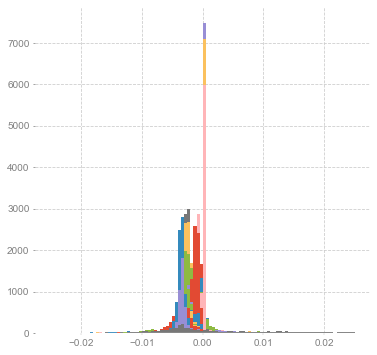

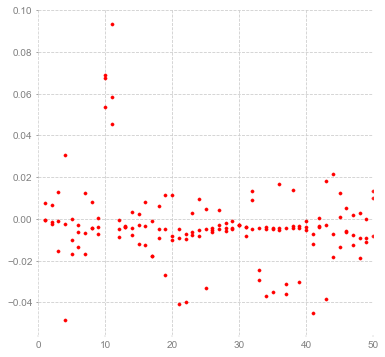

In [26]:
verbose= True
save_csv = True
plot = True

fig, ax = plt.subplots(figsize=(6, 6))
fig1, ax1 = plt.subplots(figsize=(6, 6))

for ctdfile in sorted(glob.glob(fpath + '*.cnv')):
    if 'a.cnv' in ctdfile:
        continue
    print(f"Working on {ctdfile}")

    ctd_df = ctd.from_cnv(ctdfile)

    ctd_df.describe()

    #add a column for erddap - profileid
    # following entries are from cnv files.  check for consistency with cast logs
    ctd_df['profile_id'] = fpath.split('/')[-3]+ctd_df._metadata['name']
    try:
        ctd_df['latitude'] = ctd_df._metadata['lat']
        ctd_df['longitude'] = ctd_df._metadata['lon']
        ctd_df['time'] = ctd_df._metadata['time']
    except:
        print("no gps")
        pass

    if verbose:
        saldiff = ctd_df.sal00-ctd_df.sal11
        print(f"Profile Averaged Salinity Difference,STD (chan1-chan2){saldiff.mean()},{saldiff.std()}")
    if save_csv:
        ctd_df.to_csv(ctdfile.split('/')[-1].replace('.cnv','.csv'))
    if plot:
        if abs(saldiff).mean() > .2:
            saldiff = saldiff*0
        ax.hist(saldiff,bins=100,range=(-.025,.025))
        #ax.set_xlim([-0.1,0.1])
        ax1.scatter(int(ctdfile.split('/')[-1].split('.')[0].split('ctd')[1]),
                 saldiff.mean(),s=10,c='red')
        ax1.set_xlim([0,50])


### Make some very simple range/climo qc choices

Temp: -2,20   
Sal:  20,36   
Par:  0,2000   
Chlor: 0,100   


In [19]:
qc_range_limits = {'temperature':[-2,20],
             'salinity': [30,36],
             'par': [0,2000],
             'chlorophyl': [0,100]}

In [20]:
for ctdfile in sorted(glob.glob(fpath + '*.cnv')):
    try:
        print(f"Working on {ctdfile}")
        ctd_df = ctd.from_cnv(ctdfile)
        ctd_df['t090C'][(ctd_df['t090C'] < qc_range_limits['temperature'][0])|(ctd_df['t090C'] > qc_range_limits['temperature'][1])] = np.nan
        ctd_df['t190C'][(ctd_df['t190C'] < qc_range_limits['temperature'][0])|(ctd_df['t190C'] > qc_range_limits['temperature'][1])] = np.nan
        ctd_df['sal11'][(ctd_df['sal11'] < qc_range_limits['salinity'][0])|(ctd_df['sal11'] > qc_range_limits['salinity'][1])] = np.nan
        ctd_df['sal00'][(ctd_df['sal00'] < qc_range_limits['salinity'][0])|(ctd_df['sal00'] > qc_range_limits['salinity'][1])] = np.nan
        ctd_df['par'][(ctd_df['par'] < qc_range_limits['par'][0])|(ctd_df['par'] > qc_range_limits['par'][1])] = np.nan
        ctd_df['flECO-AFL'][(ctd_df['flECO-AFL'] < qc_range_limits['chlorophyl'][0])|(ctd_df['flECO-AFL'] > qc_range_limits['chlorophyl'][1])] = np.nan
    except:
        pass
    
    if save_csv:
        ctd_df.to_csv(ctdfile.split('/')[-1].replace('.cnv','.csv'))

Working on /Users/bell/ecoraid/2020/CTDcasts/dy2001/rawconverted/ctd001.cnv
Working on /Users/bell/ecoraid/2020/CTDcasts/dy2001/rawconverted/ctd002.cnv
Working on /Users/bell/ecoraid/2020/CTDcasts/dy2001/rawconverted/ctd003.cnv
Working on /Users/bell/ecoraid/2020/CTDcasts/dy2001/rawconverted/ctd004.cnv
Working on /Users/bell/ecoraid/2020/CTDcasts/dy2001/rawconverted/ctd005.cnv
Working on /Users/bell/ecoraid/2020/CTDcasts/dy2001/rawconverted/ctd006.cnv
Working on /Users/bell/ecoraid/2020/CTDcasts/dy2001/rawconverted/ctd007.cnv
Working on /Users/bell/ecoraid/2020/CTDcasts/dy2001/rawconverted/ctd008.cnv
Working on /Users/bell/ecoraid/2020/CTDcasts/dy2001/rawconverted/ctd009.cnv
Working on /Users/bell/ecoraid/2020/CTDcasts/dy2001/rawconverted/ctd010.cnv
Working on /Users/bell/ecoraid/2020/CTDcasts/dy2001/rawconverted/ctd011.cnv
Working on /Users/bell/ecoraid/2020/CTDcasts/dy2001/rawconverted/ctd012.cnv
Working on /Users/bell/ecoraid/2020/CTDcasts/dy2001/rawconverted/ctd013.cnv
Working on /

### Create and Save Plots

Inputs are the respective columns in the data fram and identifiers for coloring.

In [21]:
ctd_df.columns

Index(['c0mS/cm', 'c1mS/cm', 'flECO-AFL', 'sbeox0V', 't090C', 't190C', 'timeS',
       'sbeox1V', 'par', 'turbWETntu0', 'sal00', 'sal11', 'sigma-t00',
       'sigma-t11', 'sbeox0ML/L', 'sbox0Mm/Kg', 'sbeox0PS', 'sbeox1ML/L',
       'sbox1Mm/Kg', 'sbeox1PS', 'flag'],
      dtype='object')

In [22]:
filetype = 'csv'

plots=True
for ctdfile in sorted(glob.glob('*ctd*.csv')):
    if not plots:
        break
    try:
        if 'cnv' in filetype:
            print(f"Working on {ctdfile}")
            ctd_df = ctd.from_cnv(ctdfile)
            ctd_data = EcoSeabird.CTDProfilePlot()
            file_ending = '.cnv'
        elif 'csv' in filetype:
            print(f"Working on {ctdfile}")
            ctd_df = pd.read_csv(ctdfile, index_col=['Pressure [dbar]'])
            ctd_data = EcoSeabird.CTDProfilePlot()
            file_ending = '.csv'

    except:
        continue
    
    #plots
    try:
        plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','S_41','S_42'],
                          xdata=[ctd_df.t090C,ctd_df.t190C,ctd_df.sal00,ctd_df.sal11],
                          ydata=ctd_df.index.values,
                          secondary=True,
                          xlabel=['Temperature','Salinity'])

        DefaultSize = fig.get_size_inches()
        fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
        plt.savefig(ctdfile.split('/')[-1].replace(file_ending,'_TempSal.png'))
        plt.close(fig)

        plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','OST_62','CTDOST_4220'],
                          xdata=[ctd_df.t090C,ctd_df.t190C,ctd_df.sbeox0PS,ctd_df.sbeox1PS],
                          ydata=ctd_df.index.values,
                          secondary=True,
                          xlabel=['Temperature','Oxygen'])

        DefaultSize = fig.get_size_inches()
        fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
        plt.savefig(ctdfile.split('/')[-1].replace(file_ending,'_TempOxy.png'))
        plt.close(fig)

        plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','ST_70','ST_2070'],
                          xdata=[ctd_df.t090C,ctd_df.t190C,ctd_df['sigma-t00'],ctd_df['sigma-t11']],
                          ydata=ctd_df.index.values,
                          secondary=True,
                          xlabel=['Temperature','SigmaT'])

        DefaultSize = fig.get_size_inches()
        fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
        plt.savefig(ctdfile.split('/')[-1].replace(file_ending,'_TempSigmaT.png'))
        plt.close(fig)
    except:
        print("plotting failed")
        continue

    try:
        plt,fig =ctd_data.plot2var(epic_key=['PAR_905','PAR_905','Fch_906','Trb_980'],
                          xdata=[ctd_df.par,ctd_df.par,ctd_df['flECO-AFL'],ctd_df.turbWETntu0],
                          ydata=ctd_df.index.values,
                          secondary=True,
                          xlabel=['Par','Chlo/Turb'])

        DefaultSize = fig.get_size_inches()
        fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
        plt.savefig(ctdfile.split('/')[-1].replace(file_ending,'_ParChlorTurb.png'))
        plt.close(fig)
    except:
        plt,fig =ctd_data.plot2var(epic_key=['PAR_905','PAR_905','fWS_973','Tr_904'],
                          xdata=[ctd_df.par,ctd_df.par,ctd_df['wetStar'],ctd_df.CStarTr0],
                          ydata=ctd_df.index.values,
                          secondary=True,
                          xlabel=['Par','Chlo/Turb'])

        DefaultSize = fig.get_size_inches()
        fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
        plt.savefig(ctdfile.split('/')[-1].replace(file_ending,'_ParChlorTrans.png'))
        plt.close(fig)
        
    try:
        fig = EcoSeabird.plot_salvtemp(ctd_df.sal00,ctd_df.t090C,ctd_df.index,
                            srange=[ctd_df.sal00.min()-0.25,ctd_df.sal00.max()+.25],
                            trange=[ctd_df.t090C.min()-0.25,ctd_df.t090C.max()+.25],
                            ptitle=ctdfile.split('/')[-1])
        fig.savefig(ctdfile.split('/')[-1].replace(file_ending,'_TSSigma_depth.png'))
        plt.close(fig)
        
    except:
        print("plotting failed")
        continue

Working on ctd001.csv
Working on ctd002.csv
Working on ctd003.csv
Working on ctd004.csv
Working on ctd005.csv
Working on ctd006.csv
Working on ctd007.csv
Working on ctd008.csv
Working on ctd009.csv
Working on ctd010.csv
Working on ctd011.csv
Working on ctd012.csv
Working on ctd013.csv
Working on ctd014.csv
Working on ctd015.csv
Working on ctd016.csv
Working on ctd017.csv
Working on ctd018.csv
Working on ctd019.csv
Working on ctd020.csv
Working on ctd021.csv
Working on ctd022.csv
Working on ctd023.csv
Working on ctd024.csv
Working on ctd025.csv
Working on ctd026.csv
Working on ctd027.csv
Working on ctd028.csv
Working on ctd029.csv
Working on ctd030.csv
Working on ctd031.csv
Working on ctd031a.csv
Working on ctd032.csv
Working on ctd033.csv
Working on ctd034.csv
Working on ctd035.csv
Working on ctd036.csv
Working on ctd037.csv
Working on ctd038.csv
Working on ctd039.csv
Working on ctd040.csv
Working on ctd041.csv
Working on ctd042.csv
Working on ctd043.csv
Working on ctd044.csv
Working o

Working on ctd001*.csv
Working on ctd002*.csv
Working on ctd003*.csv
Working on ctd004*.csv
Working on ctd005*.csv
Working on ctd006*.csv
Working on ctd007*.csv
Working on ctd008*.csv
Working on ctd009*.csv
Working on ctd010*.csv
Working on ctd011*.csv
Working on ctd012*.csv
Working on ctd013*.csv
Working on ctd014*.csv
Working on ctd015*.csv
Working on ctd016*.csv
Working on ctd017*.csv
Working on ctd018*.csv
Working on ctd019*.csv
Working on ctd020*.csv
Working on ctd021*.csv
Working on ctd022*.csv
Working on ctd023*.csv
Working on ctd024*.csv
Working on ctd025*.csv
Working on ctd026*.csv
Working on ctd027*.csv
Working on ctd028*.csv
Working on ctd029*.csv
Working on ctd030*.csv
Working on ctd031*.csv
Working on ctd032*.csv
Working on ctd033*.csv
Working on ctd034*.csv
Working on ctd035*.csv
Working on ctd036*.csv
Working on ctd037*.csv
Working on ctd038*.csv
Working on ctd039*.csv
Working on ctd040*.csv
Working on ctd041*.csv
Working on ctd042*.csv
Working on ctd043*.csv
Working on 

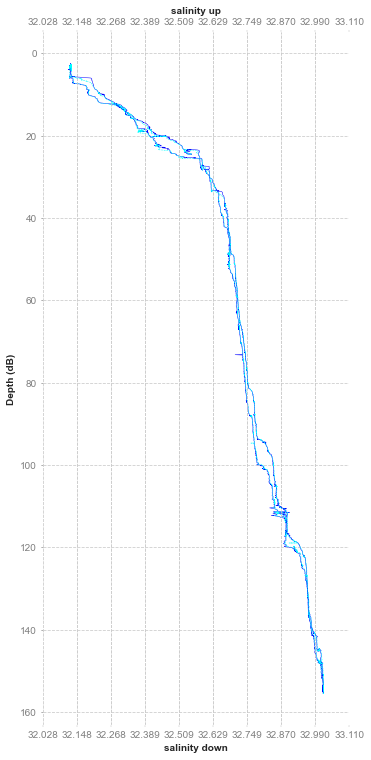

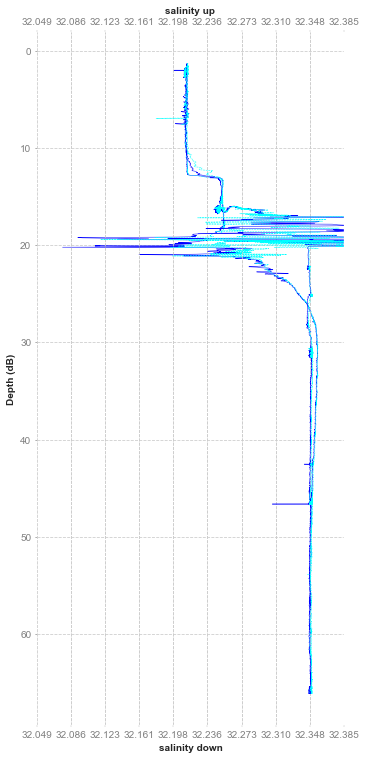

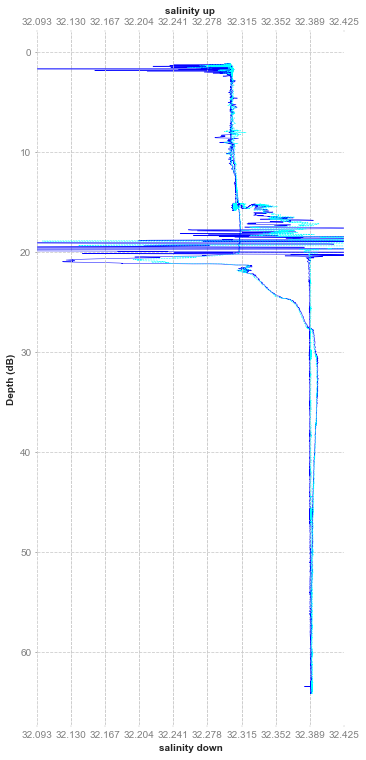

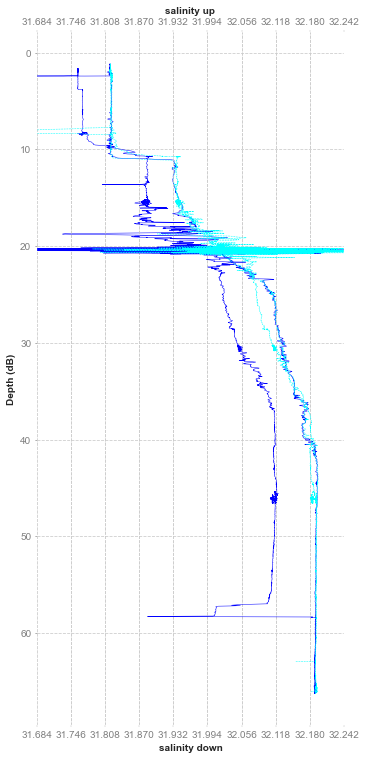

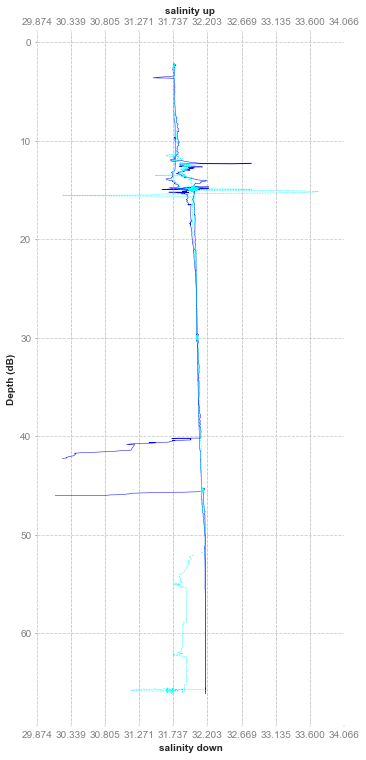

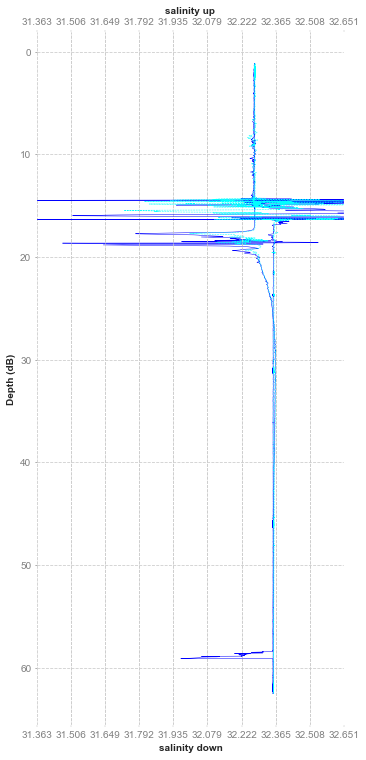

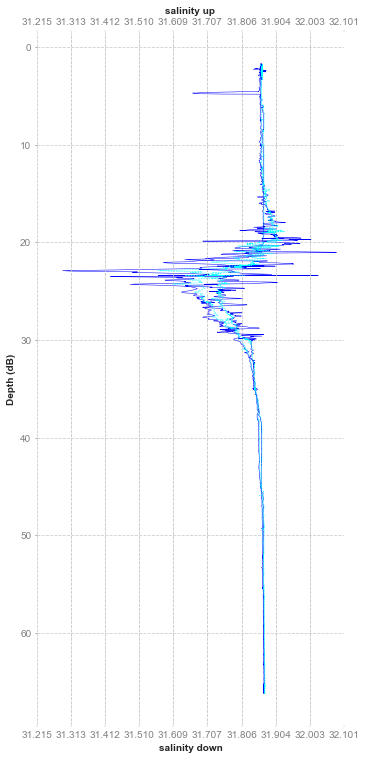

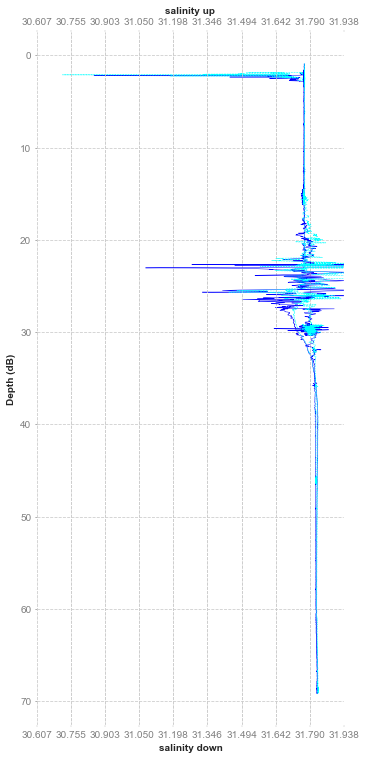

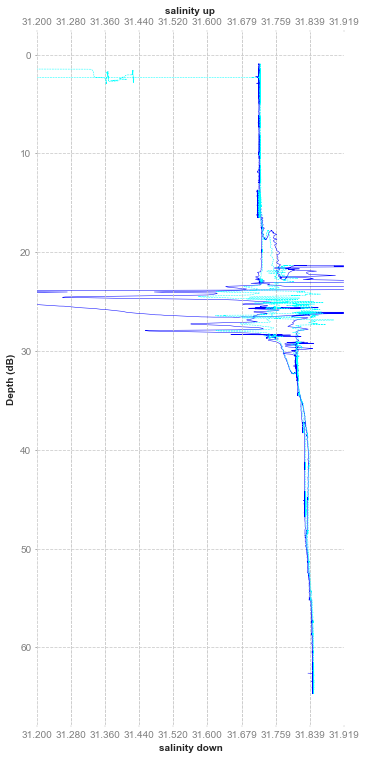

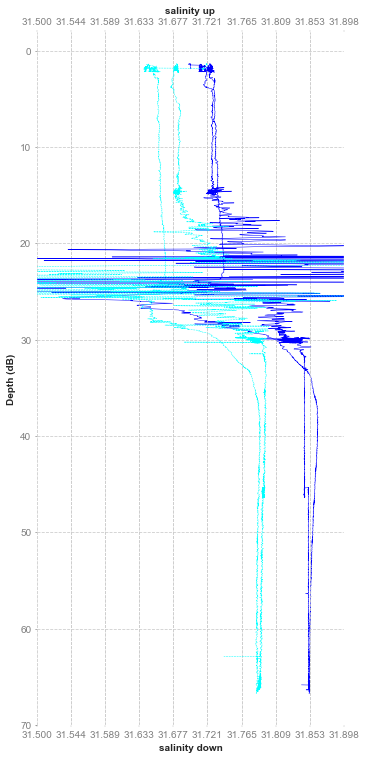

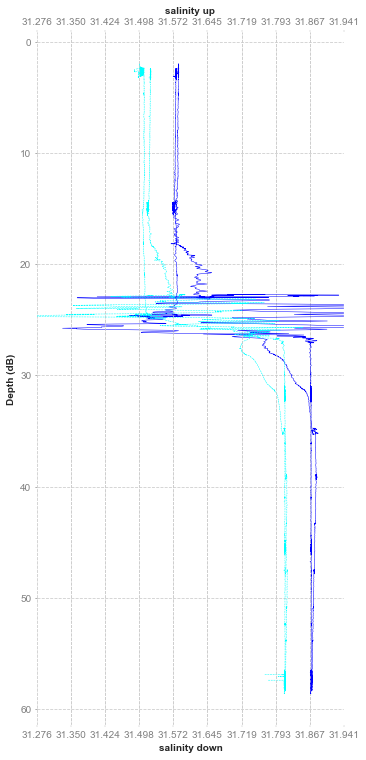

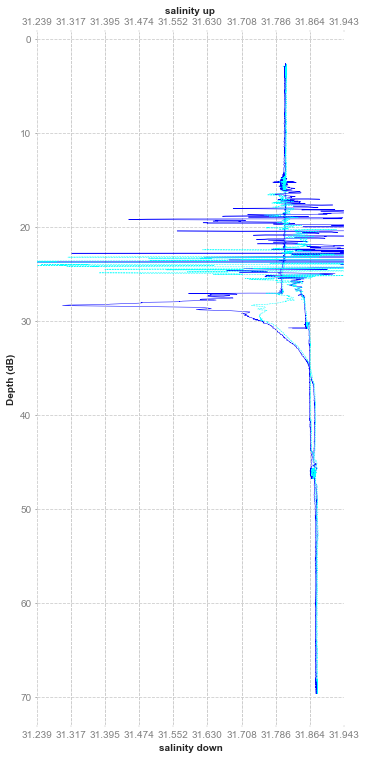

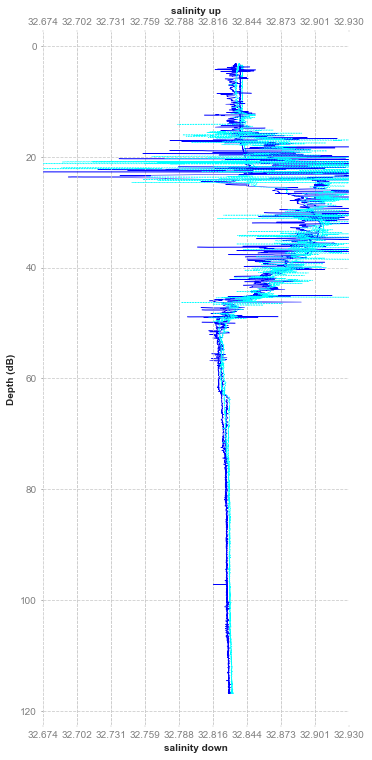

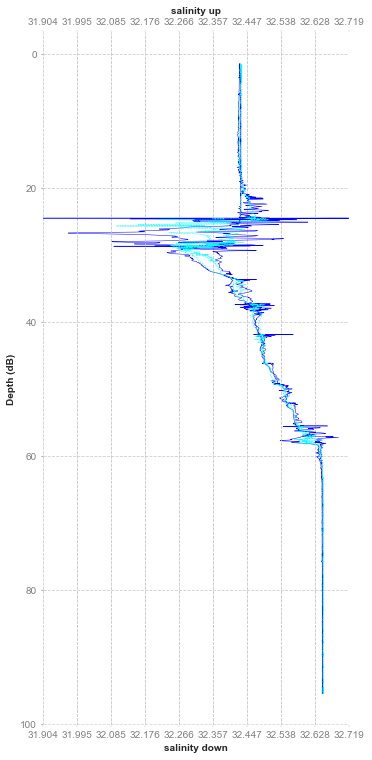

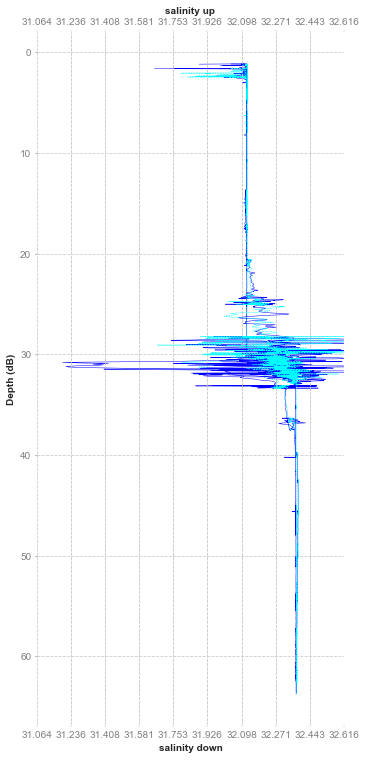

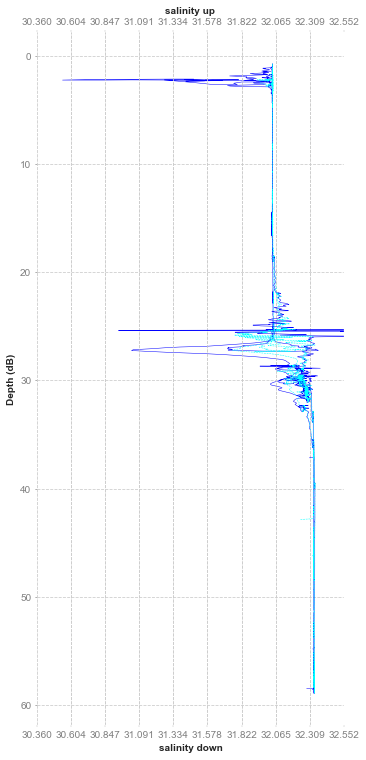

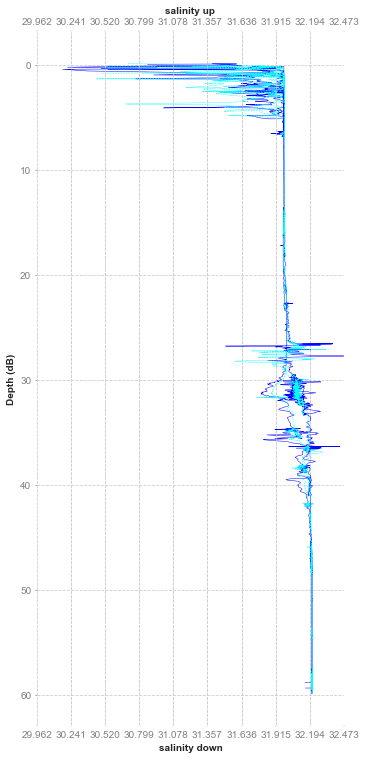

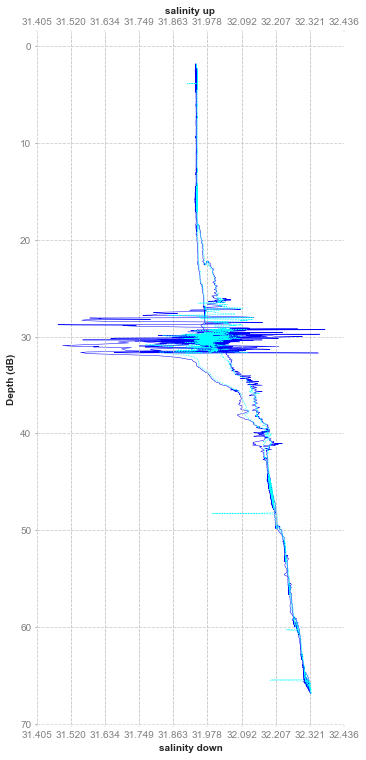

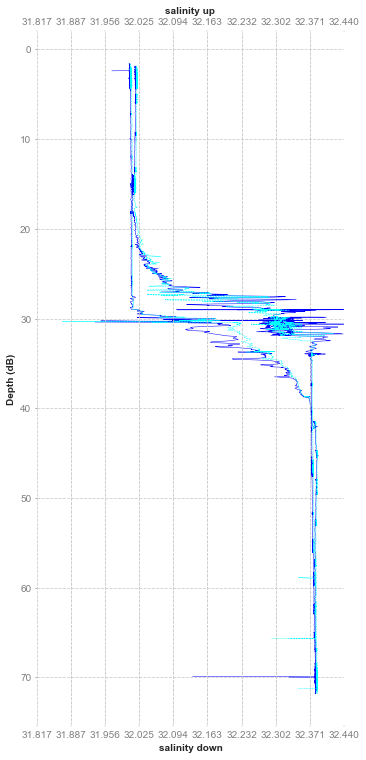

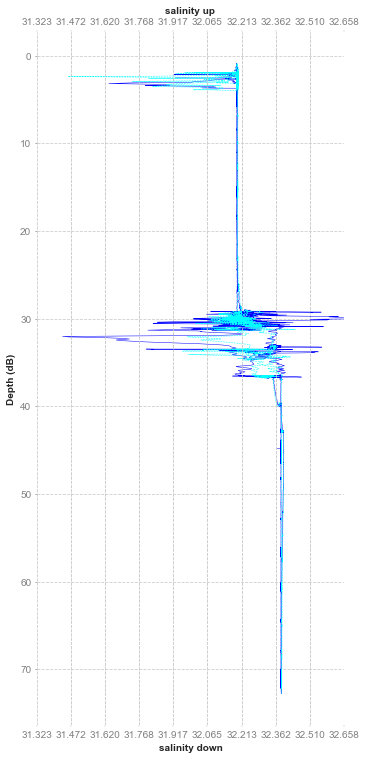

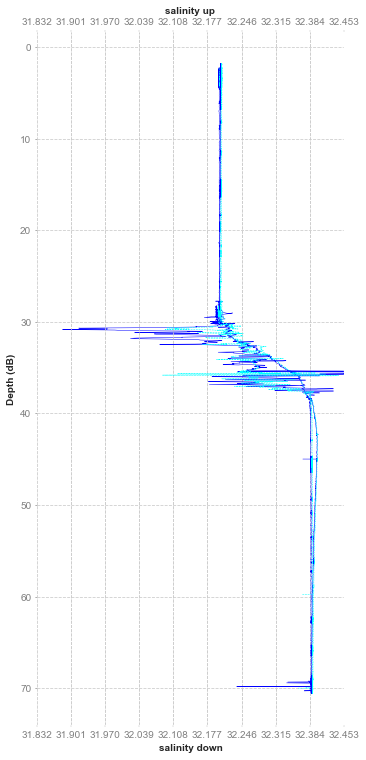

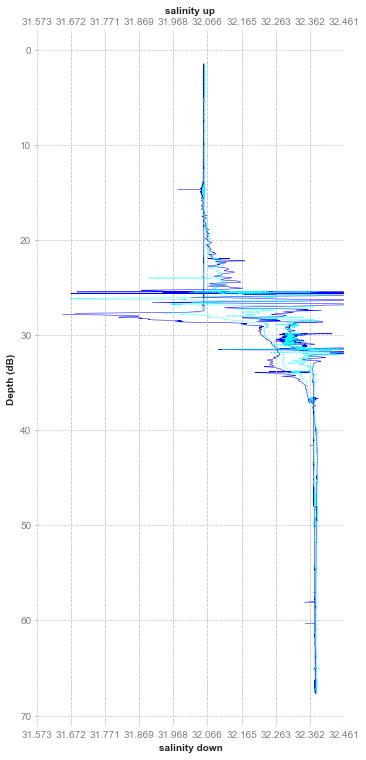

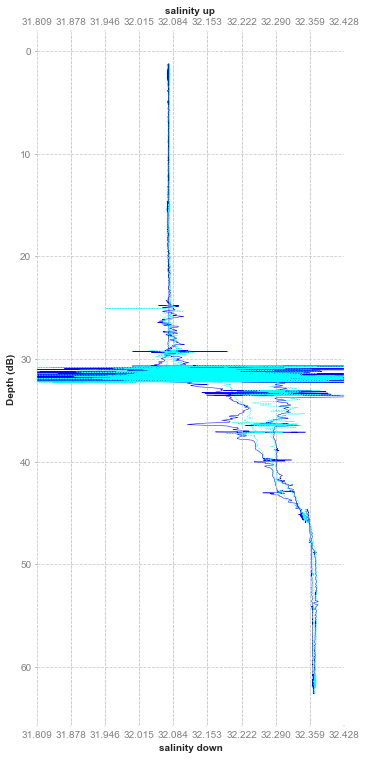

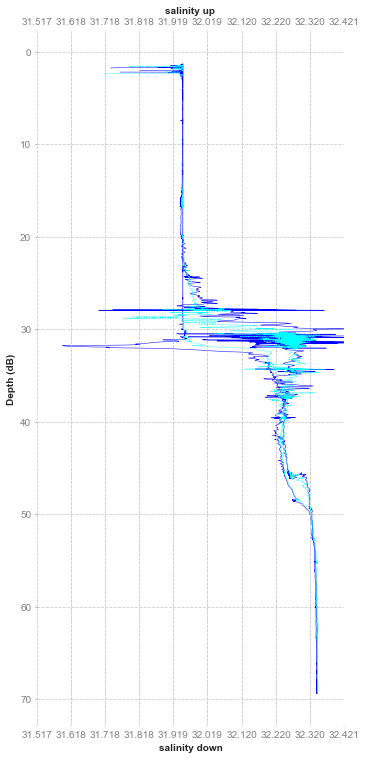

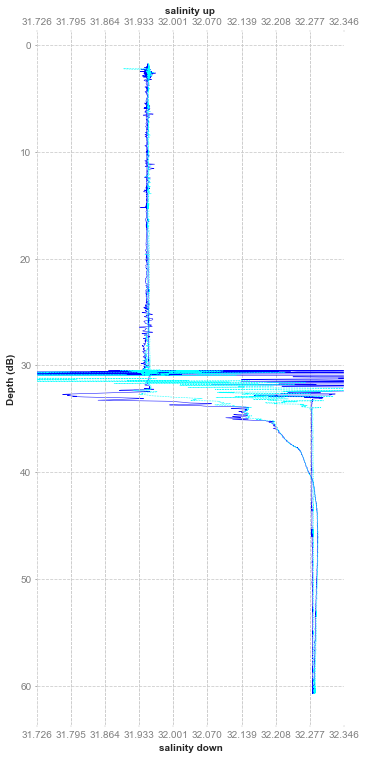

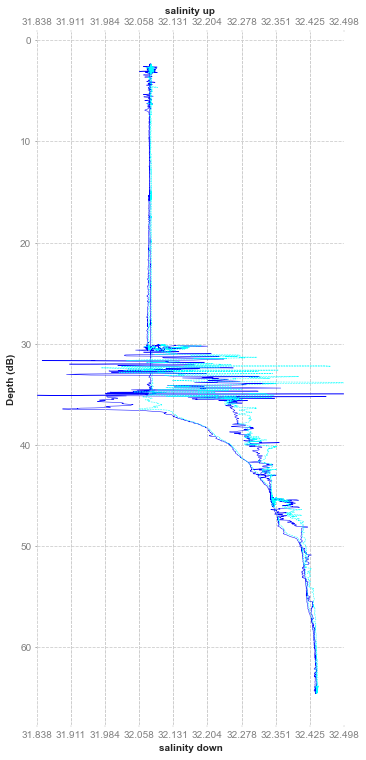

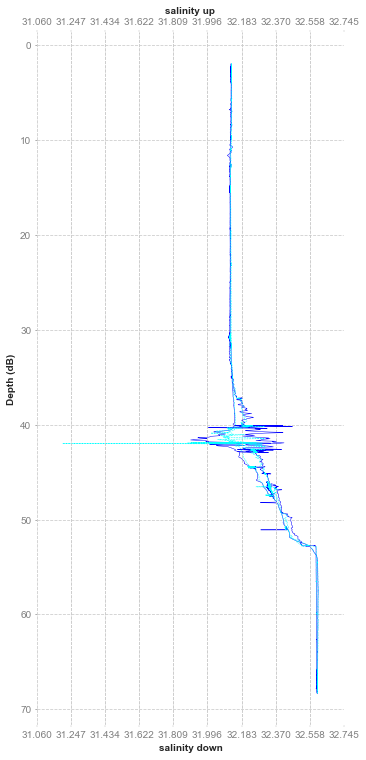

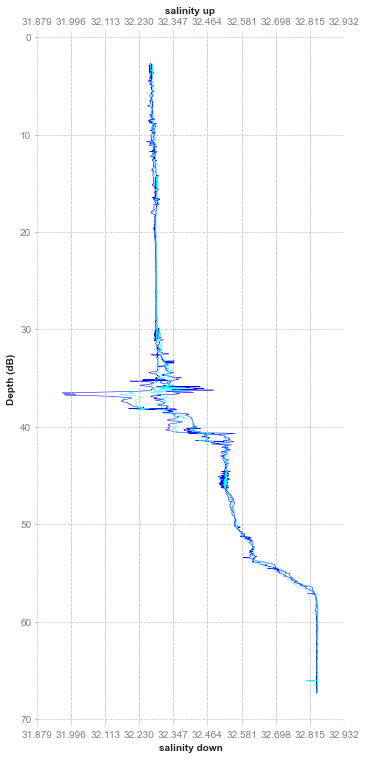

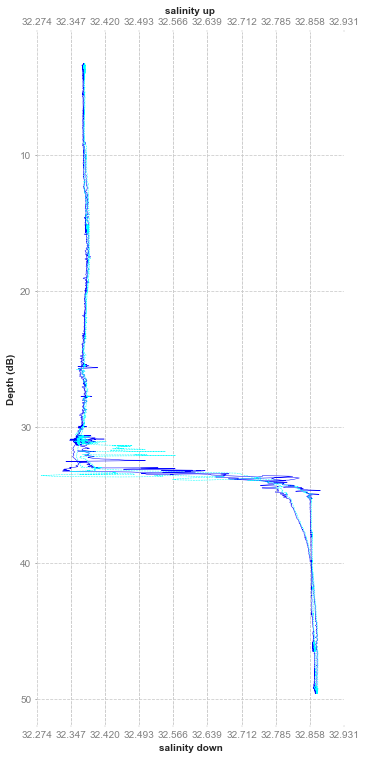

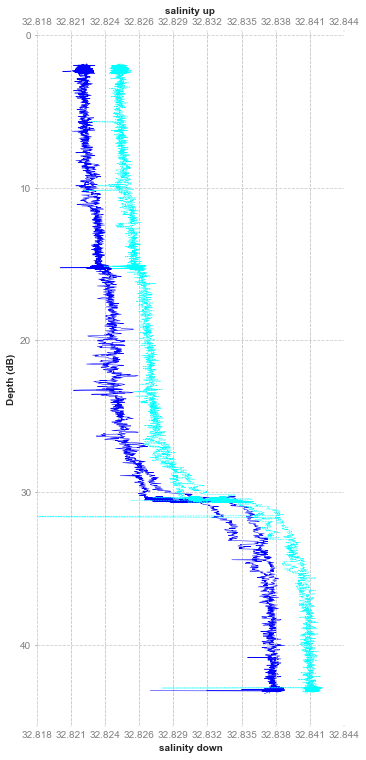

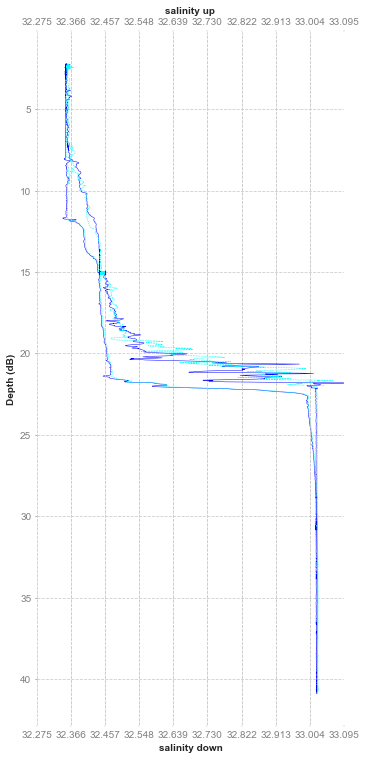

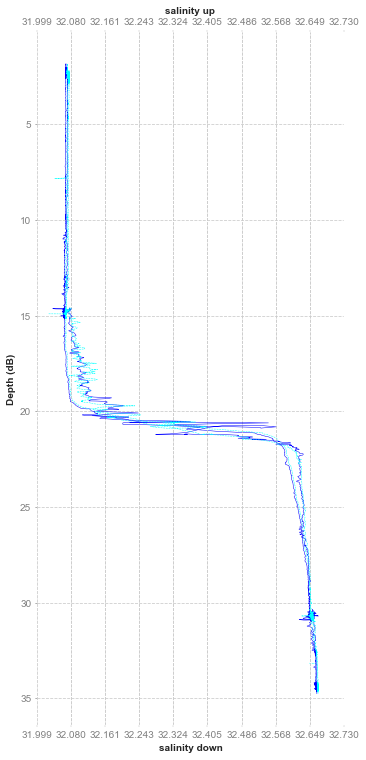

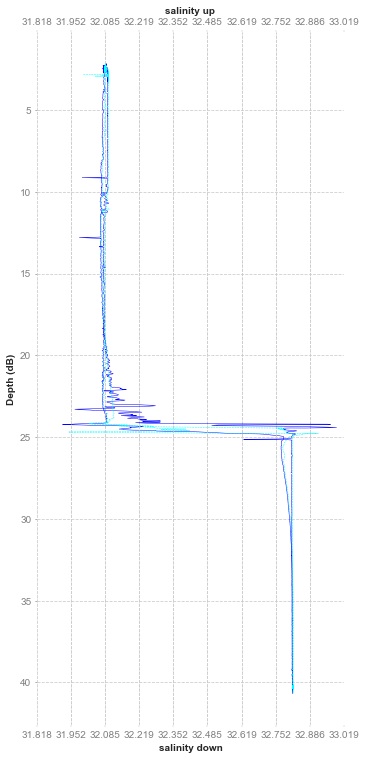

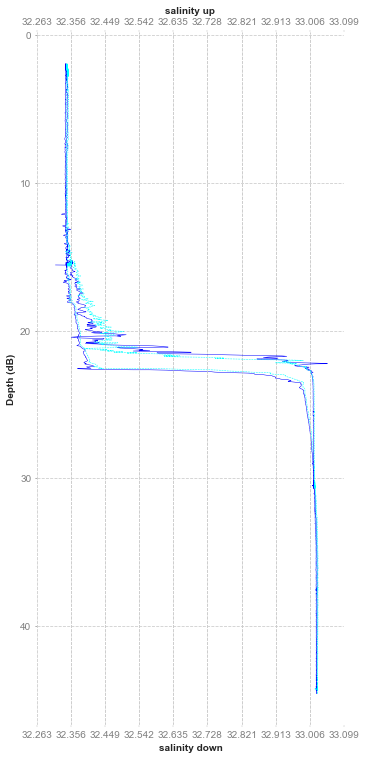

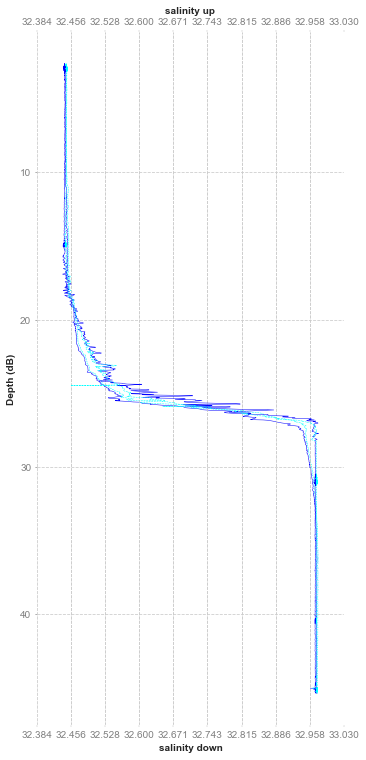

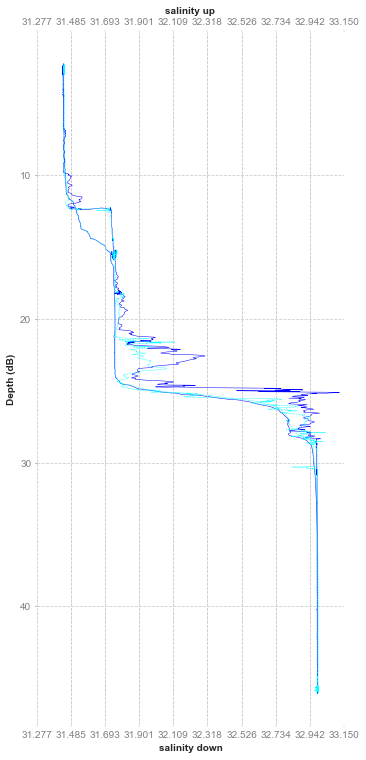

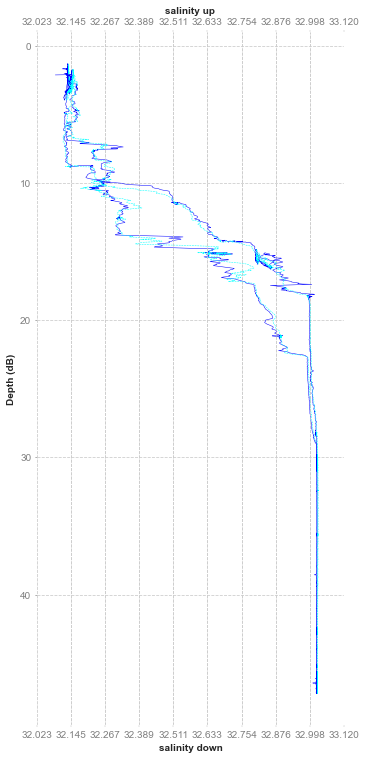

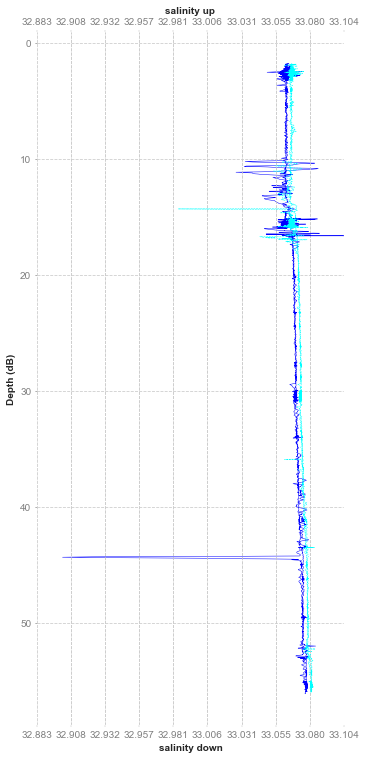

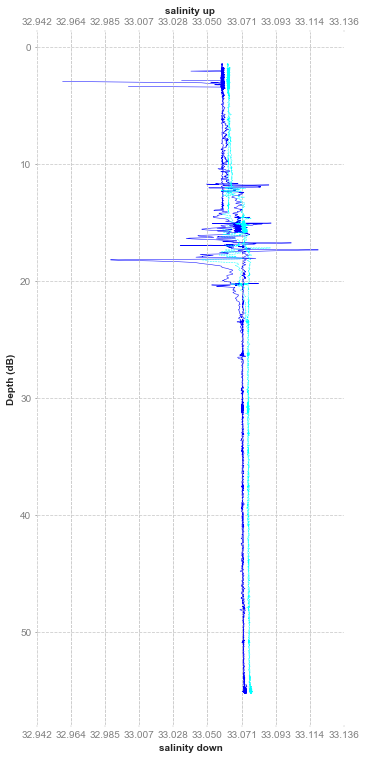

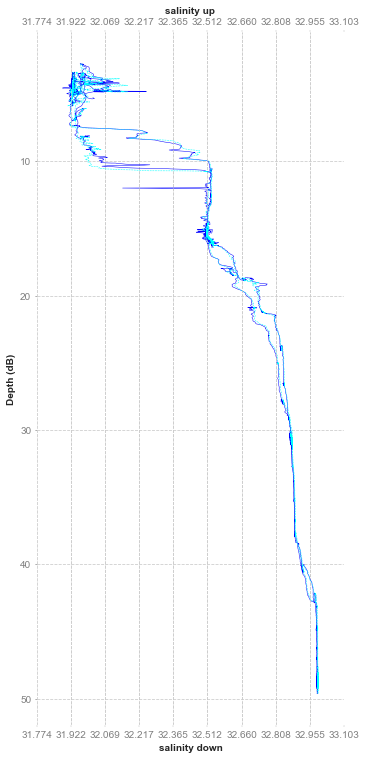

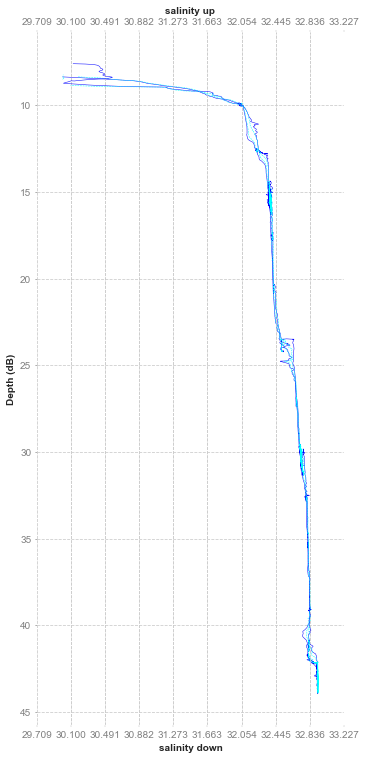

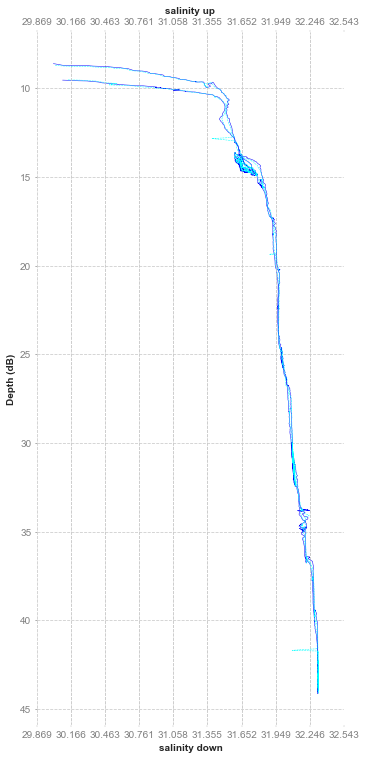

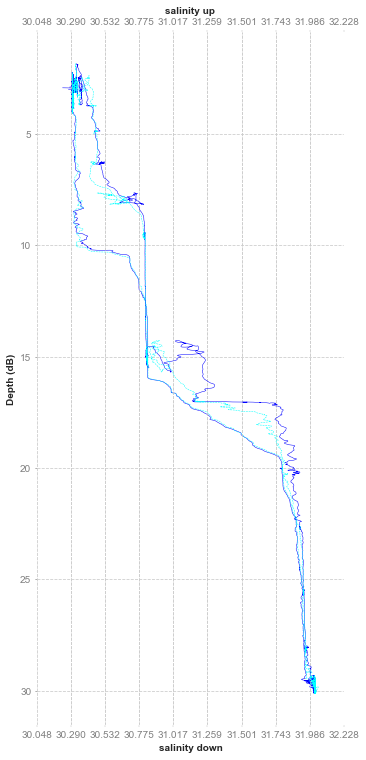

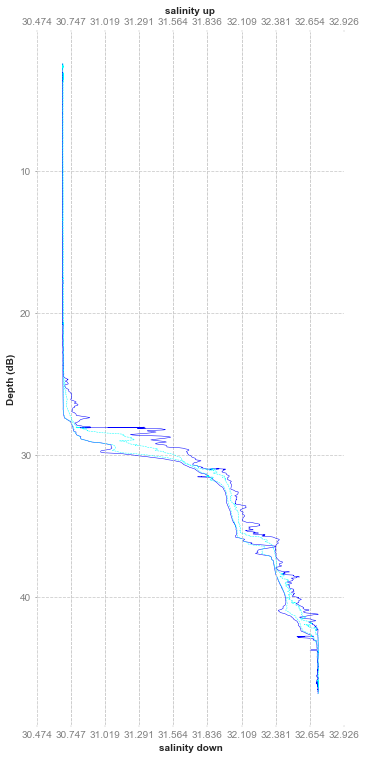

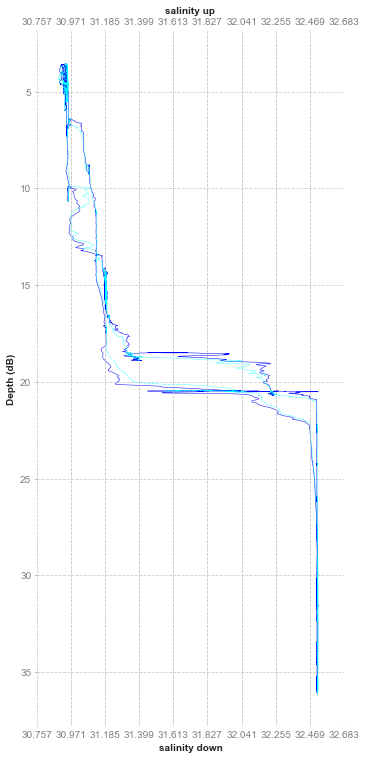

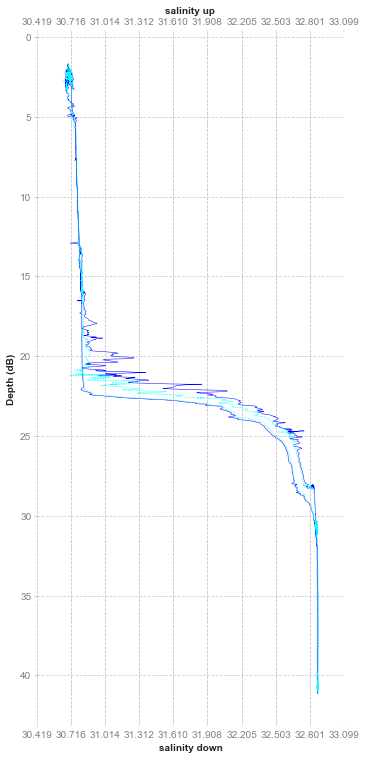

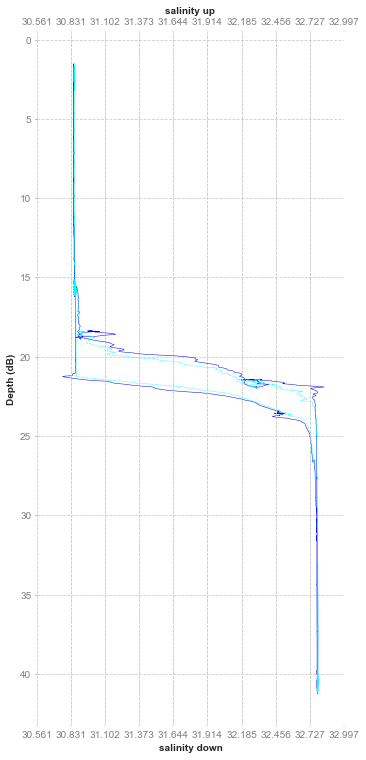

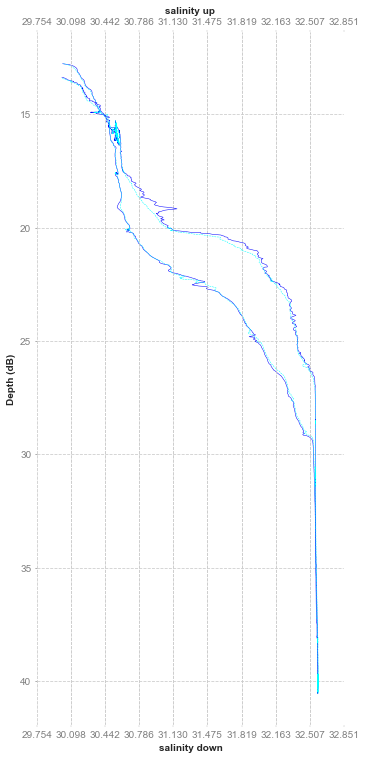

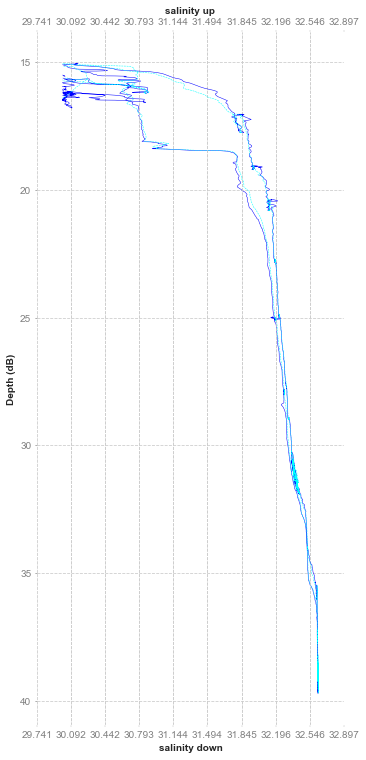

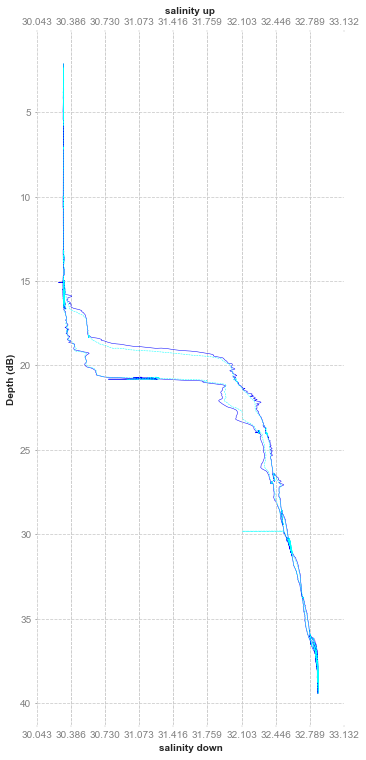

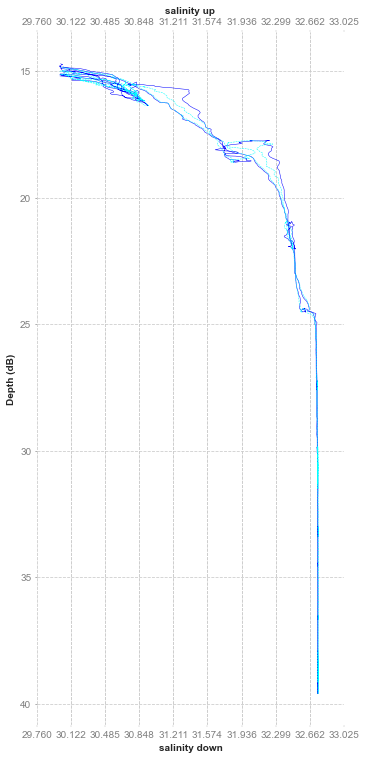

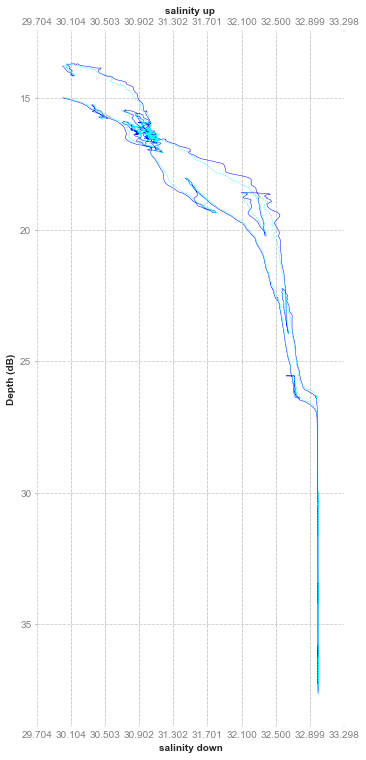

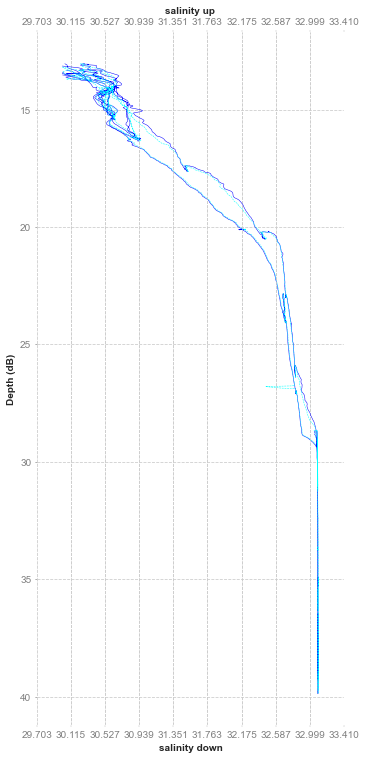

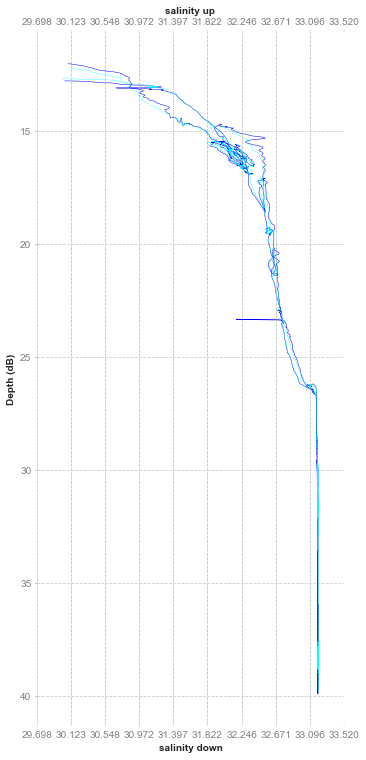

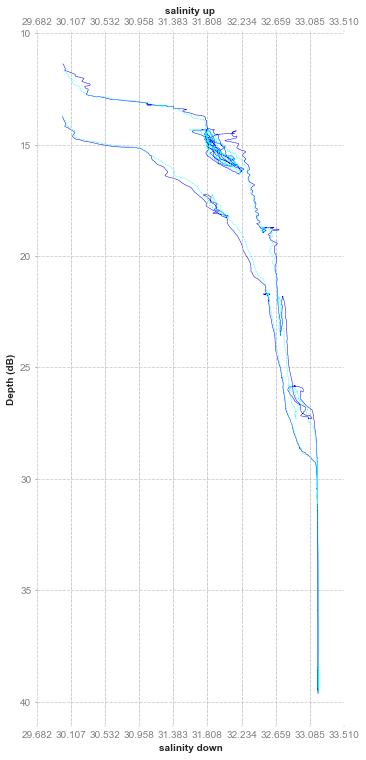

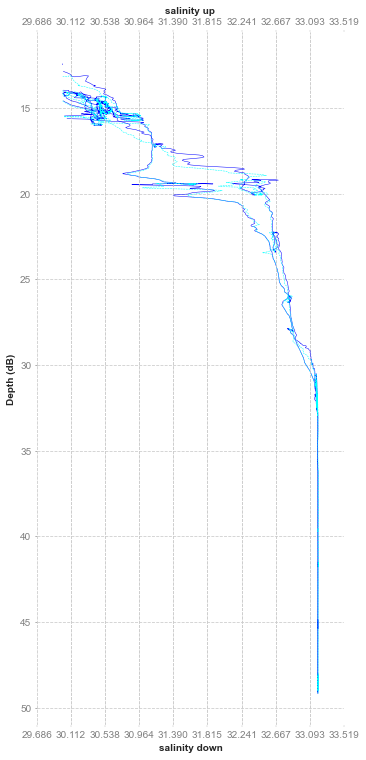

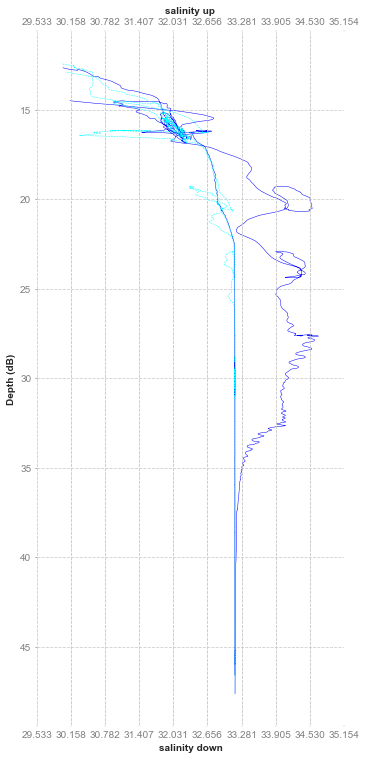

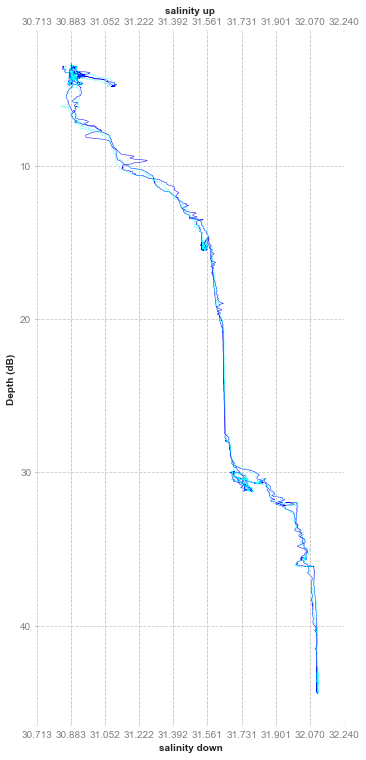

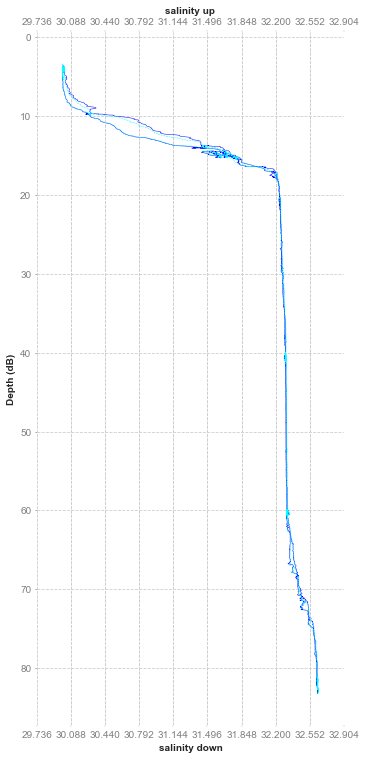

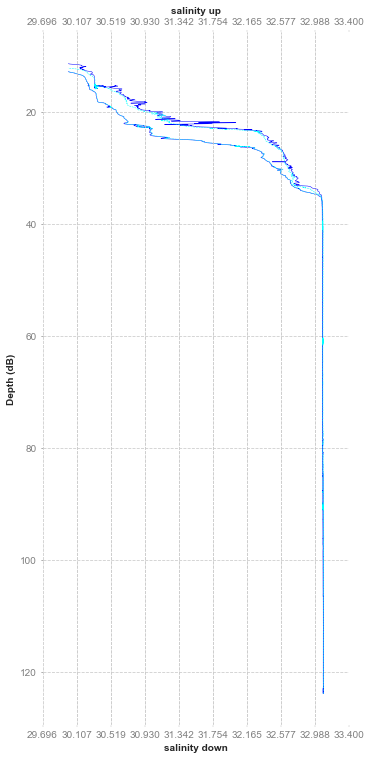

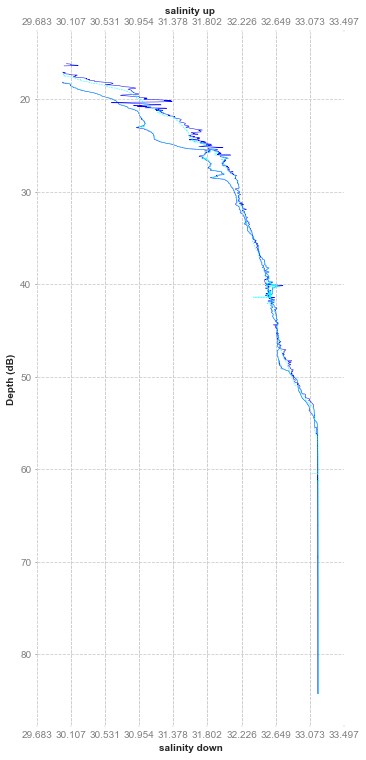

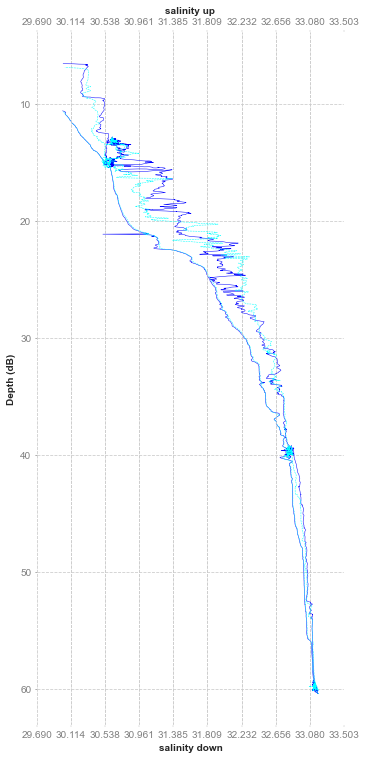

In [23]:
# two casts

plots=True
for count in range(1,100,1):
    try:
        ctdcount = str(count).zfill(3)
        ctdfile = 'ctd'+ctdcount+'*.csv'

        print(f"Working on {ctdfile}")
        ctd_df_d = pd.read_csv(glob.glob('*d'+ctdfile)[0], index_col=['Pressure [dbar]'])
        ctd_df_u = pd.read_csv(glob.glob('*u'+ctdfile)[0], index_col=['Pressure [dbar]'])
        #ctd_df = pd.read_csv(glob.glob(ctdfile)[0], index_col=['Pressure [dbar]'])
        ctd_data = EcoSeabird.CTDProfilePlot()
        file_ending = '.csv'

        plt,fig =ctd_data.plot2var_2y(epic_key=['S_41','S_42','S_41','S_42'],
                          xdata=[ctd_df_d.sal00,ctd_df_d.sal11,ctd_df_u.sal00,ctd_df_u.sal11],
                          ydata=[ctd_df_d.index.values,ctd_df_u.index.values],
                          secondary=True,
                          xlabel=['salinity down','salinity up'])    
        DefaultSize = fig.get_size_inches()
        fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
        fig.savefig(ctdfile.split('/')[-1].replace(file_ending,'_updown_salcompare.png'))
    except:
        continue
    